# Introducción a la Inteligencia Artificial

## CLASE 3

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)
- [DRIVE](https://drive.google.com/drive/folders/1TDRvlwfSgLI39gHXgVhWlSaRJ-aTSaDE?usp=sharing)

## Comentarios sobre el estado del documento



## Importar librerías

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

# MATPLOTLIB & SNS
# from mpl_toolkits import mplot3d
# from matplotlib import cm
# from matplotlib_venn import venn2
# import seaborn as sns

# MATH & RANDOM
# import math
# import numpy.random as random
# import scipy.stats as stats
# random.seed(42)

#PANDAS
# import pandas as pd

# %matplotlib inline

In [205]:
# Ejercicio 1 


FILE_PATH = "C:/Users/jota_/00_Especialización_IA/00_Recursos/01_DataSets/income.data.csv"
# vertical stack para agregar la columna de 1

"""
Consigna:

1. Escribir una clase dataset que levante los datos en un numpy array estructurado
2. La clase tiene que tener un metodo para separar los datos en 80% train y 20% test
3. Hacer una clase que implemente regresion lineal
4. Regresion lineal con b
5. Prediccion
6. Graficos
7. ECM
"""
    
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def split(self, percentage):
        # divides the dataset by permutating, masking and slicing into train and split
        SIZE = self.dataset.shape[0]
        data_total = self.dataset
        idx = np.arange(0, SIZE)
        
        # permutate
        perm_idx = np.random.permutation(idx)
        
        # generate index slice
        train_idx = perm_idx[:int(SIZE * percentage)]
        test_idx = perm_idx[int(SIZE * percentage):]
        
        # slice dataset
        train_data = data_total[train_idx]
        test_data = data_total[test_idx]
        
        def vector_creator(vector, dataset):
            x = dataset[vector].reshape(dataset[vector].shape[0], 1)
            return x
        
        X_train = vector_creator('X', train_data)
        y_train = vector_creator('y', train_data)
        X_test = vector_creator('X', test_data)
        y_test = vector_creator('y', test_data)

        return X_train, y_train, X_test, y_test

    def _build_dataset(self, path):
        ## creates structured array
        structure = [('X', np.float32), ('y', np.float32)]
        structure = np.dtype(structure)
        # load numpy array from disk using a generator
        with open(path, encoding="utf8") as file:
                    data_gen = ((line.split(',')[1], line.split(',')[2]) 
                                for line in file if not line.split(',')[1][2].isalpha())
                    data_total = np.fromiter(data_gen, structure)
        
        return data_total


    
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, y):
        # train del model
        return NotImplemented

    def predict(self, X):
        # return Y hat
        return NotImplemented


    
class LinearRegression(BaseModel):

    def fit(self, X, y):
        
        XtX = np.matmul(X.T,X)
        XtXi = np.linalg.inv(XtX)
        XtXiXt = np.matmul(XtXi,X.T)
        W = np.matmul(XtXiXt, y)
        
        self.model = W
        return NotImplemented

    def predict(self, X):
        y_pred = np.matmul(X, self.model)
        
        return y_pred
        # usar el modelo para predecir Y hat a partir de X y W



        
class LinearRegressionAffine(BaseModel):

    def fit(self, X, y, order = 1):
        
        self.order = order
        
        X_repeat_order = np.repeat(X, order + 1, axis = 1)
        
        X_order = np.zeros(shape=X_repeat_order.shape)
        
        orders = np.array(range(order +1))
        
        #Este código introduce un error computacional para ordenes mayores a 8..
        #X_order = np.apply_along_axis(np.power, 0, X_repeat_order.T, orders).T
        
        for i in orders:
    
            X_order[:,i] =  X_repeat_order[:,i]**i

        XtX = np.matmul(X_order.T,X_order)
        XtXi = np.linalg.inv(XtX)
        XtXiXt = np.matmul(XtXi,X_order.T)
        Wb = np.matmul(XtXiXt, y)
        
        
        self.model = Wb
        return Wb

    def predict(self, X):
        
        
        X_repeat_order = np.repeat(X, self.order + 1, axis = 1)

        orders = np.array(range(self.order +1))

        X_order = np.apply_along_axis(np.power, 0, X_repeat_order.T, orders).T
        y_pred = np.matmul(X_order, self.model)
        
        return y_pred
        # usar el modelo para predecir Y hat a partir de X y W

        

class Metric(object):

    def __call__(self, target, prediction):
        return NotImplemented


class MSE(Metric):

    def __call__(self, target, prediction):
        error = target - prediction
        error_sq = error**2
        MSE = np.mean(error_sq)

        return MSE

The MSE from the Linear Regression Without Intercept is: 0.46921626
The MSE from the Linear Regression WITH Intercept is: 0.48620362071769757
[[ 9.79416467e-01]
 [ 8.38186609e-02]
 [ 6.72389715e-02]
 [ 5.11838800e-02]
 [-1.38270578e-02]
 [ 9.46830810e-04]]


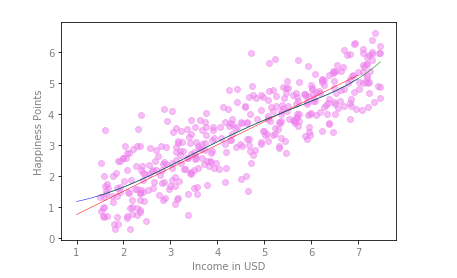

In [226]:
## Test

# Model predict Linear Regression without intercept

income_happi = Data(FILE_PATH)
X_train, y_train, X_test, y_test = income_happi.split(0.8)

Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)
y_pred = Linear_reg.predict(X_test)
evaluation_lin_reg = MSE()
W = Linear_reg.model 
print('The MSE from the Linear Regression Without Intercept is:', evaluation_lin_reg(y_test, y_pred))


# Model predict linear Regression with Intercept
Linear_reg_a = LinearRegressionAffine()
Linear_reg_a.fit(X_train, y_train, 5)

Wa = Linear_reg_a.model
y_pred = Linear_reg_a.predict(X_test)
evaluation_lin_reg_a = MSE() 
print('The MSE from the Linear Regression WITH Intercept is:', evaluation_lin_reg_a(y_test, y_pred))
print(Wa)
# Graph

X = np.linspace(1, 7 , 1000).reshape([1000, 1])
Xa = np.hstack((X, np.ones([1000, 1])))

train_ids = X_train.argsort(axis=0)

plt.scatter(X_train, y_train, alpha=0.5, c='violet')
plt.plot(X, np.matmul(X,W), color= 'red',  linewidth = 0.5)
plt.plot(X, Linear_reg_a.predict(X), color='blue', linewidth = 0.5)
plt.plot(X_train[train_ids][:,0], Linear_reg_a.predict(X_train[train_ids][:,0]), color='green', linewidth = 0.5)

# Title
plt.title('Model comparison: Linear Regression vs Linear Regression with Intercept', c='w')

plt.xlabel('Income in USD', color= 'grey')
plt.ylabel('Happiness Points', color= 'grey')

plt.xticks(c='grey')
plt.yticks(c='grey')

plt.show()



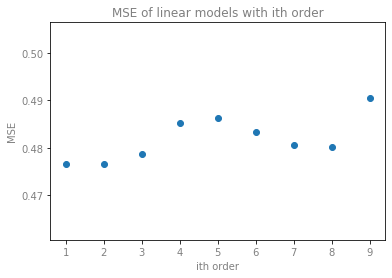

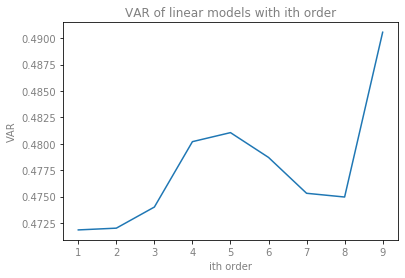

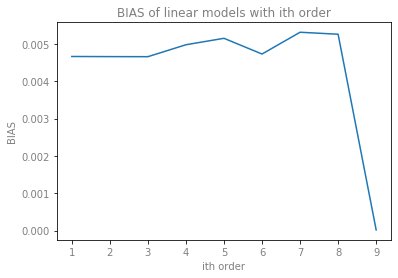

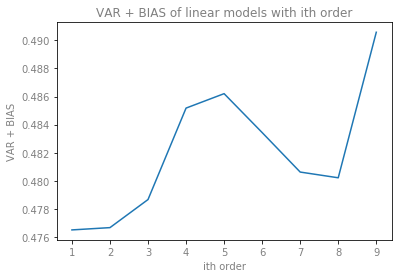

<Figure size 432x288 with 0 Axes>

In [229]:


var = np.array([])
bias = np.array([])
mse = np.array([])
models = np.array([])

for i in range(1, 10):
    Linear_reg_a.fit(X_train, y_train, i)
    Wa = Linear_reg_a.model
    y_pred = Linear_reg_a.predict(X_test)
    evaluation_lin_reg_a = MSE() 
    mse_model_i = evaluation_lin_reg_a(y_test, y_pred)
    

    var_i = np.var((y_pred - y_test))
    bias_i = np.mean((y_test - y_pred.mean()))**2
    models = np.hstack([models, i])
    var = np.hstack([var, var_i])
    bias = np.hstack([bias, bias_i])
    mse = np.hstack([mse, mse_model_i])
    

    
plt.scatter(models, mse)
plt.title('MSE of linear models with ith order', c='grey')

plt.xlabel('ith order', color= 'grey')
plt.ylabel('MSE', color= 'grey')

plt.xticks(c='grey')
plt.yticks(c='grey')
plt.show()
plt.clf()

model_description = np.vstack([models, var, bias, mse])

def plot_metric(model,metric, title):
    plt.plot(models, metric)
    plt.title('{} of linear models with ith order'.format(title), c='grey')

    plt.xlabel('ith order', color= 'grey')
    plt.ylabel(title, color= 'grey')

    plt.xticks(c='grey')
    plt.yticks(c='grey')
    plt.show()
    plt.clf()


plot_metric(models, var, 'VAR')
plot_metric(models, bias, 'BIAS')
plot_metric(models, var+bias, 'VAR + BIAS')


In [106]:
from sklearn.linear_model import LinearRegression as LinReg_Sklearn

(398, 10)
(398, 1)
(100, 1)
los parametros del modelo de sklearn son:

 [[ 0.00000000e+00  8.98905019e+01 -1.14778918e+02  8.05809253e+01
  -3.42467248e+01  9.18715310e+00 -1.56300637e+00  1.63326977e-01
  -9.55147225e-03  2.39105433e-04]] 


los parametros del modelo de Julian son:

 [[-8.34959722e+01]
 [ 2.34629147e+02]
 [-2.76012897e+02]
 [ 1.81246178e+02]
 [-7.31525953e+01]
 [ 1.88614251e+01]
 [-3.11436328e+00]
 [ 3.18400768e-01]
 [-1.83399270e-02]
 [ 4.54728571e-04]]


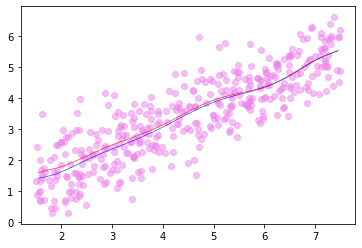

In [230]:
## Estoy teniendo inconvenientes para encotnrar la razón por la cuál divergen los resultados de SKlearn y el modelo que arme.

order = 9

X = X_train
y = y_train

X_repeat_order = np.repeat(X, order + 1, axis = 1)
orders = np.array(range(order +1))
X_order = np.apply_along_axis(np.power, 0, X_repeat_order.T, orders).T

print(X_order.shape)
print(y_train.shape)

model_1 = LinReg_Sklearn()
model_1.fit(X_order, y)
model_1.coef_


Linear_reg_a = LinearRegressionAffine()
Linear_reg_a.fit(X_train, y_train, order)

Wa = Linear_reg_a.model
y_pred = Linear_reg_a.predict(X_test)



X = X_test
y = y_test

X_test_order = np.repeat(X, order + 1, axis = 1)
orders = np.array(range(order +1))
X_order = np.apply_along_axis(np.power, 0, X_test_order.T, orders).T

print(model_1.predict(X_order).shape)

ids = X.argsort(axis=0)[:,0]

plt.scatter(X_train, y_train, alpha=0.5, c='violet')
plt.plot(X[ids,:], y_pred[ids,:], color= 'red',  linewidth = 0.5)
plt.plot(X[ids,:], model_1.predict(X_order)[ids,:], color='blue', linewidth = 0.5)


print('los parametros del modelo de sklearn son:\n\n', model_1.coef_, '\n\n')

print('los parametros del modelo de Julian son:\n\n', Wa)